In [1]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
data_rea_with_zeros=torch.load("/home/labs/rudich/gavriel/domain_adaptation_fore_rea/data_reanalysis_with_zeros_tensors")
data_fore_with_zeros=torch.load("/home/labs/rudich/gavriel/domain_adaptation_fore_rea/data_forecast_with_zeros_tensors")
meta_data_fore=torch.load("/home/labs/rudich/gavriel/testing_data_pressure/meta_data_fore")
meta_data_rea=torch.load("/home/labs/rudich/gavriel/testing_data_pressure/meta_data_rea")
timestamps_rea=torch.load("/home/labs/rudich/gavriel/testing_data_pressure/timestamps_rea.pkl")
timestamps_fore=torch.load("/home/labs/rudich/gavriel/testing_data_pressure/timestamps_forecast.pkl")

In [3]:
data_rea_with_zeros.shape

torch.Size([14894, 17, 3, 54, 81])

In [4]:
#mean per channel-> mean((model_level,latitude,longitude)) . y_axis=mean, x_axis=date . 

In [6]:
# tensor shape -> [timestamp, channels,model_level,latitude,longitude]
def mean_per_channel(meta_data,data_1:torch.tensor,data_2:torch.tensor=None,dates=meta_data_fore["timestamps"]): 
    for i in range(data_fore_with_zeros.shape[1]):
        plt.figure(figsize=(8, 4))

        plt.plot(dates, data_1[:, i].mean((1,2,3)), label='list_fore')
        if data_2!=None:
            plt.plot(dates, data_2[:, i].mean((1,2,3)), label='list_rea')

        plt.title(f'Graph {meta_data["vars"][i]}')
        plt.xlabel('Date')
        plt.ylabel('Mean')
        plt.legend()
        plt.grid(True)

        # Set x-ticks to every six months
        six_months = timedelta(days=30*12)
        start_date = dates[0]
        end_date = dates[-1]
        ticks = [start_date + six_months * i for i in range(int((end_date - start_date) / six_months) + 1)]
        plt.xticks(ticks, [tick.strftime('%Y-%m') for tick in ticks], rotation=45)


        plt.tight_layout()  
        plt.show()

In [146]:
# tensor shape -> [timestamp, channels,model_level,latitude,longitude]
def std_per_channel(meta_data,data_1:torch.tensor,data_2:torch.tensor=None,dates=meta_data_fore["timestamps"]): 
    for i in range(data_fore_with_zeros.shape[1]):
        plt.figure(figsize=(8, 4))

        plt.plot(dates, data_1[:, i].std((1,2,3)), label='list_fore')
        if data_2!=None:
            plt.plot(dates, data_2[:, i].std((1,2,3)), label='list_rea')

        plt.title(f'Graph {meta_data["vars"][i]}')
        plt.xlabel('Date')
        plt.ylabel('Mean')
        plt.legend()
        plt.grid(True)

        # Set x-ticks to every six months
        six_months = timedelta(days=30*12)
        start_date = dates[0]
        end_date = dates[-1]
        ticks = [start_date + six_months * i for i in range(int((end_date - start_date) / six_months) + 1)]
        plt.xticks(ticks, [tick.strftime('%Y-%m') for tick in ticks], rotation=45)


        plt.tight_layout()  
        plt.show()

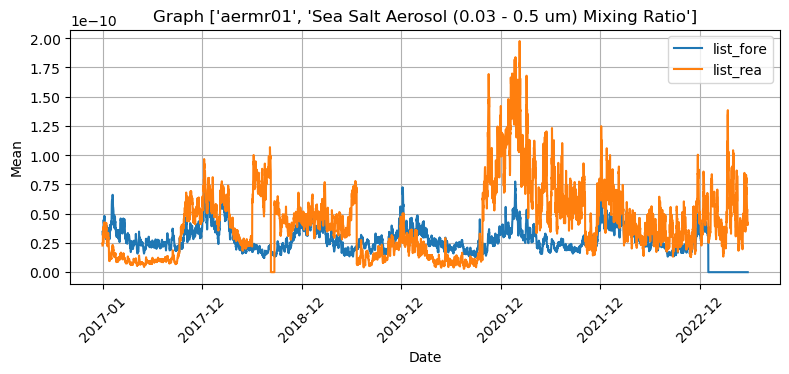

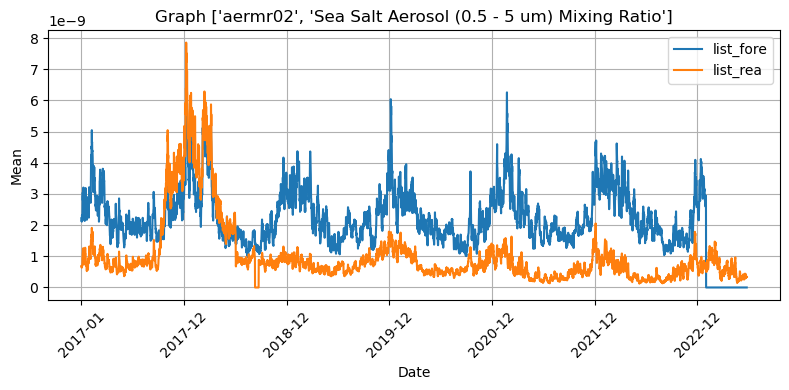

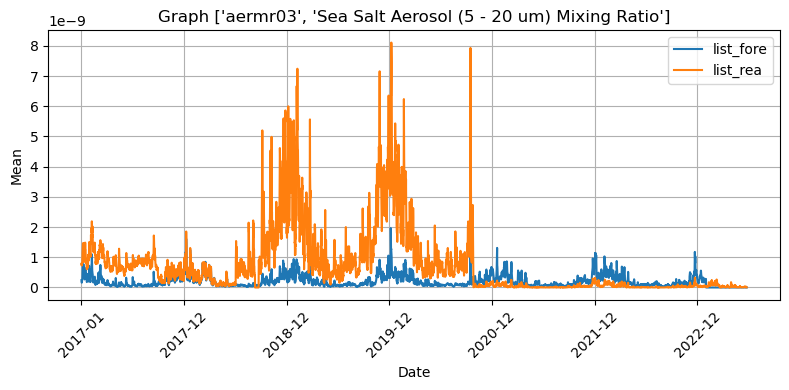

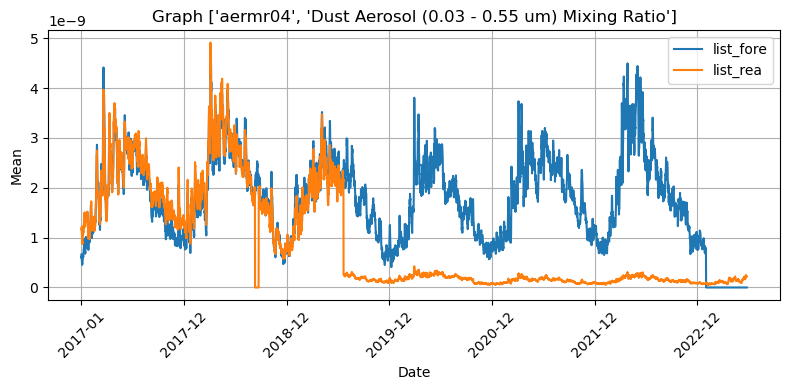

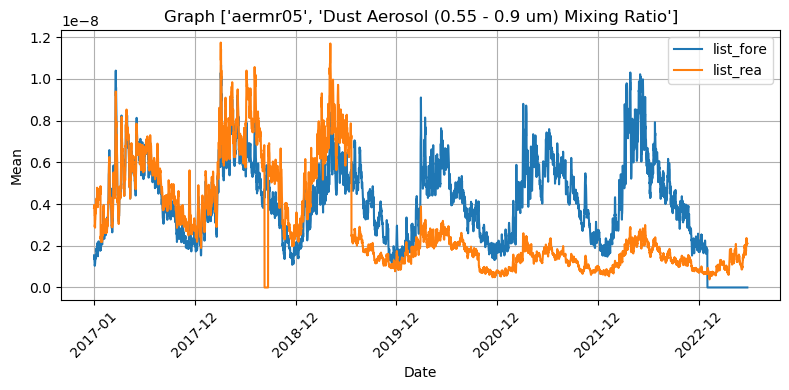

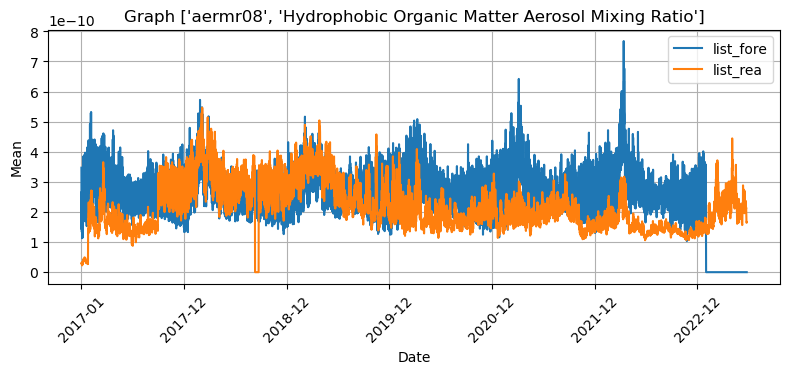

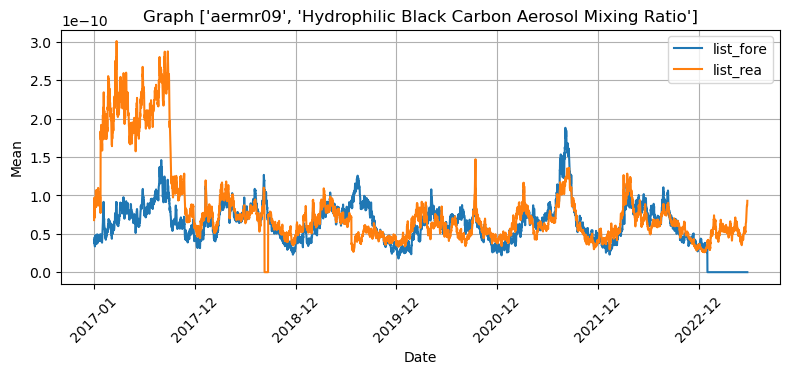

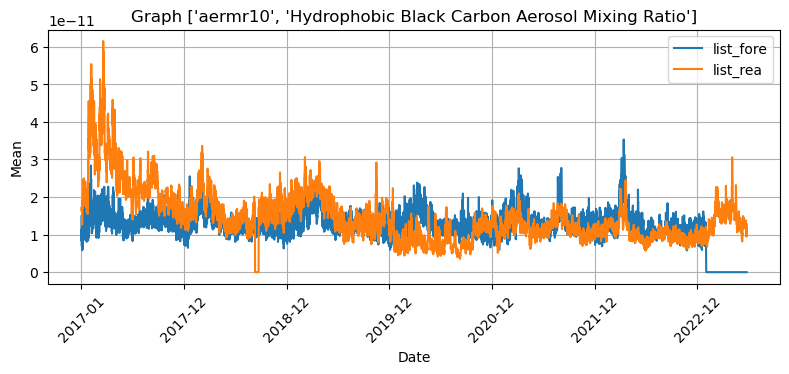

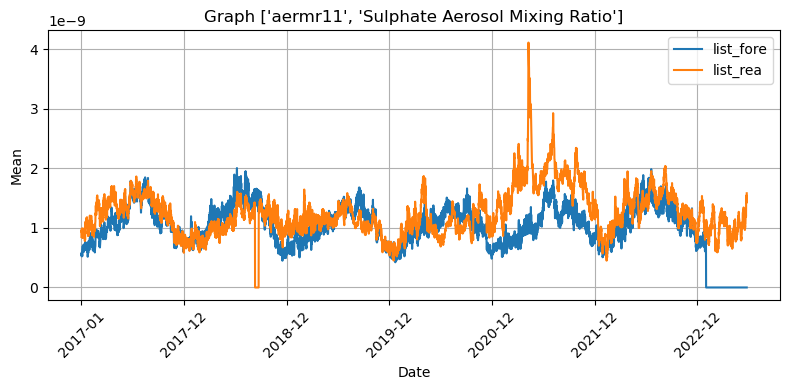

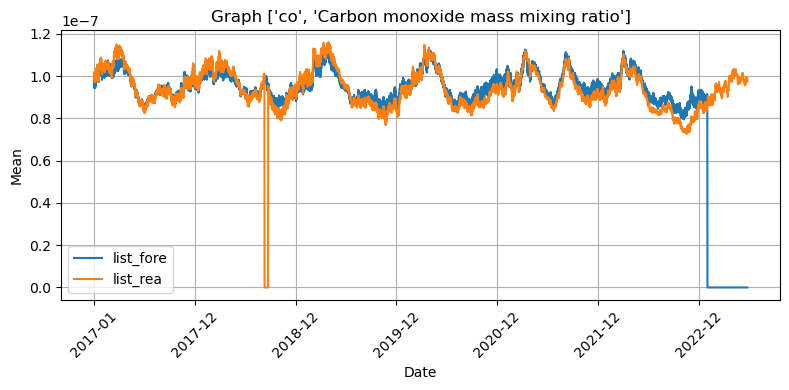

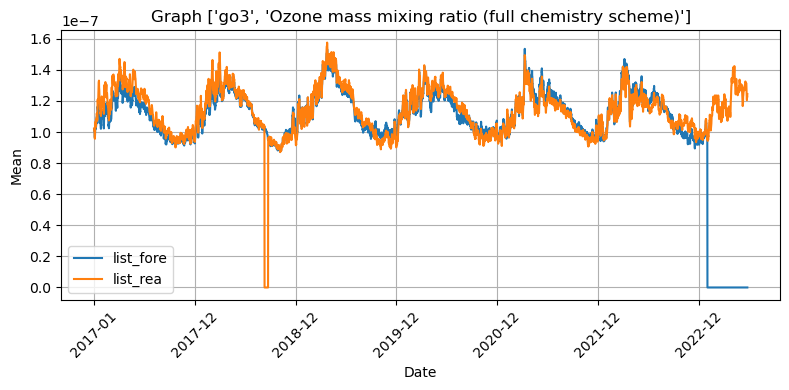

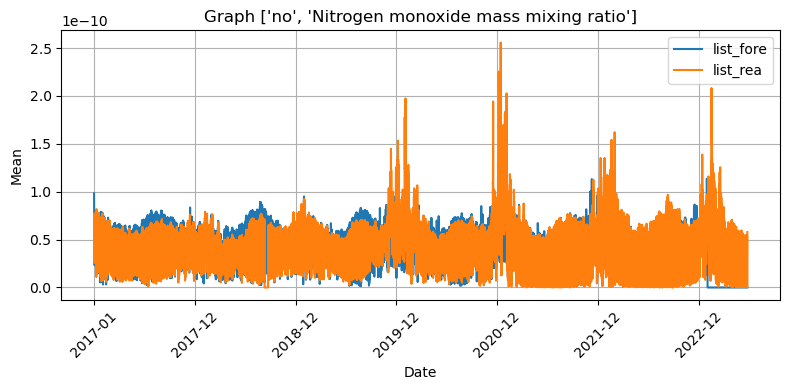

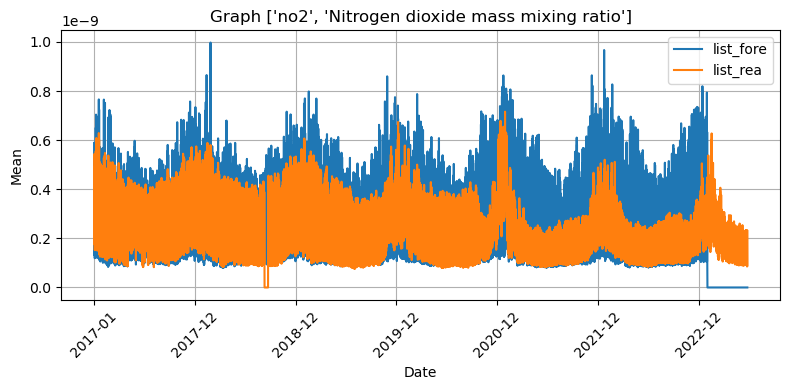

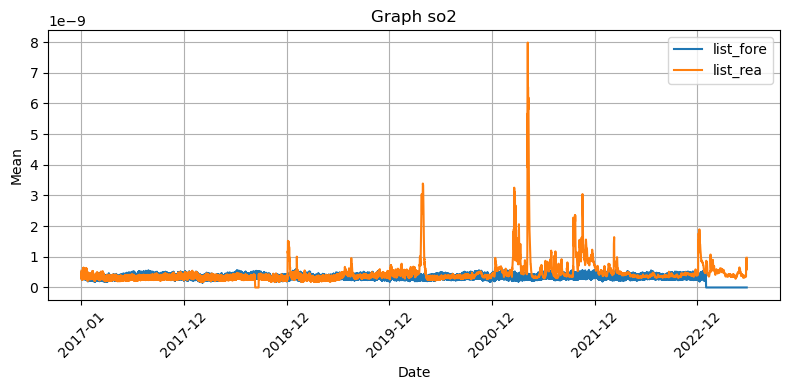

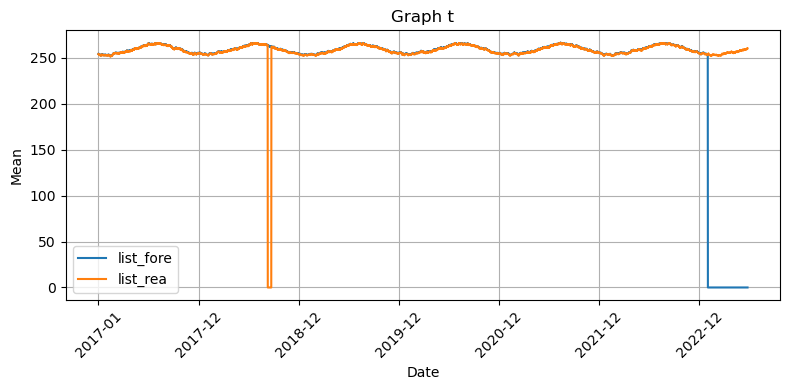

In [71]:
#for example
date=np.where(meta_data_fore["timestamps"].year>=2017)[0]
mean_per_channel(meta_data_fore["vars"],data_rea_with_zeros[date[0]:,],data_fore_with_zeros[date[0]:,:,0],dates=meta_data_fore["timestamps"][date])

In [196]:
def reanalysis_forecast_plots(meta_data, data_1: torch.tensor, data_2: torch.tensor = None):
    import matplotlib.gridspec as gridspec

    for var in range(len(meta_data["vars"])):
        # Plot data_1
        fig = plt.figure(figsize=(20, 4))  # Adjust the figure size if needed
        gs = gridspec.GridSpec(1, 5, wspace=0.3)  # Adjust wspace to control the distance between plots
        
        for day in range(5):
            ax = fig.add_subplot(gs[day])
            x = data_1[day, var, 0].numpy()  # Convert to numpy for plotting
            ax.imshow(x)
            ax.set_title(f"data1 - {meta_data['vars'][var][0]} Day {day + 1}")
            plt.colorbar(ax.imshow(x), ax=ax, fraction=0.046, pad=0.1)
        
        fig.subplots_adjust(wspace=0.3)
        plt.show()

        # Plot data_2 if provided
        if data_2 is not None:
            fig = plt.figure(figsize=(20, 4))  # Adjust the figure size if needed
            gs = gridspec.GridSpec(1, 5, wspace=0.3)  # Adjust wspace to control the distance between plots
            
            for day in range(5):
                ax = fig.add_subplot(gs[day])
                x = data_2[day, var, 0].numpy()  # Convert to numpy for plotting
                ax.imshow(x)
                ax.set_title(f"data2 - {meta_data['vars'][var][0]} Day {day + 1}")
                plt.colorbar(ax.imshow(x), ax=ax, fraction=0.046, pad=0.1)
            
            fig.subplots_adjust(wspace=0.3)
            plt.show()


In [197]:
data_rea_with_zeros.mean((0,1,2)).shape

torch.Size([54, 81])

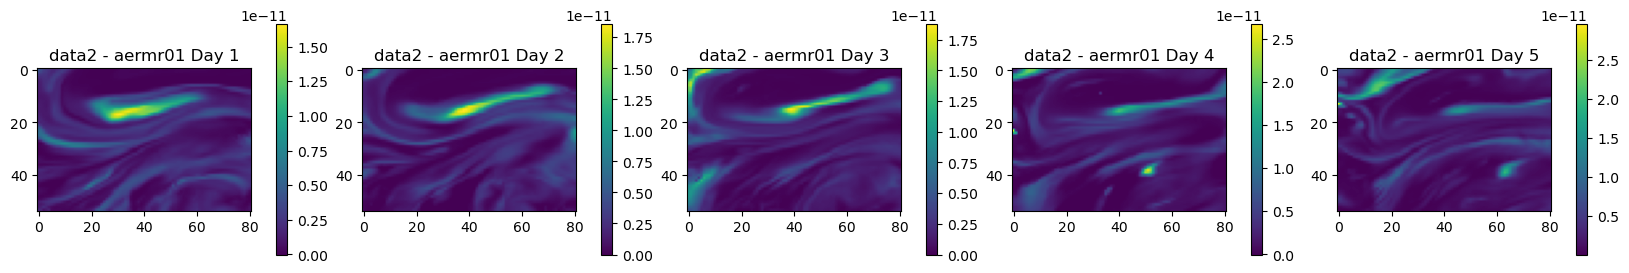

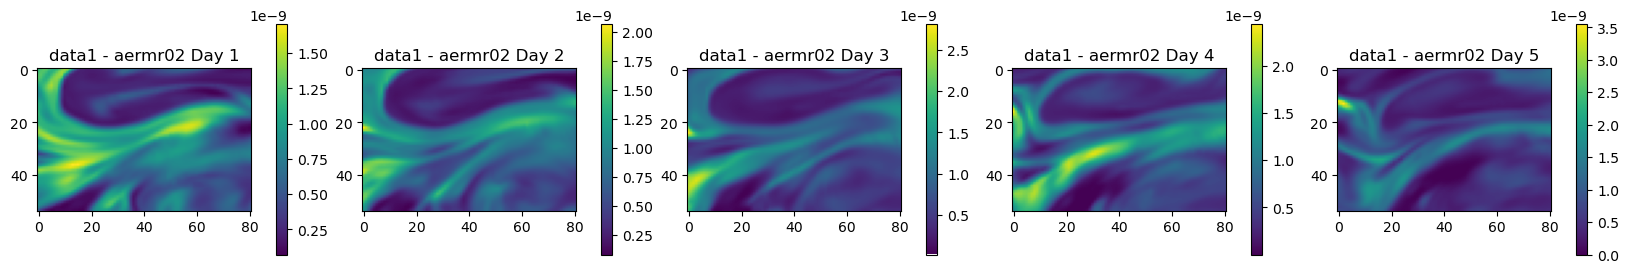

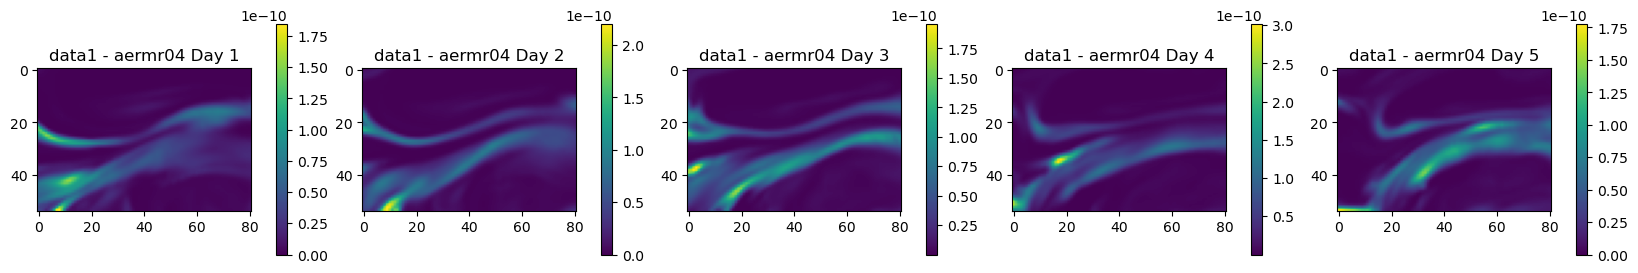

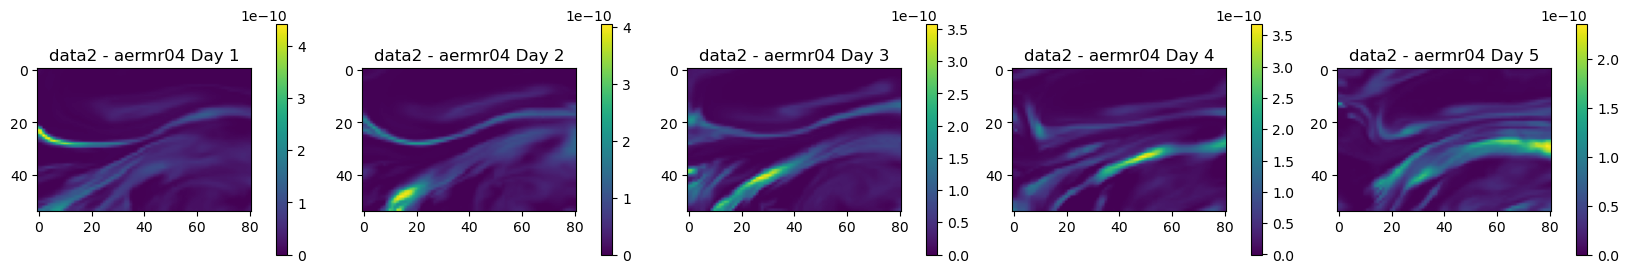

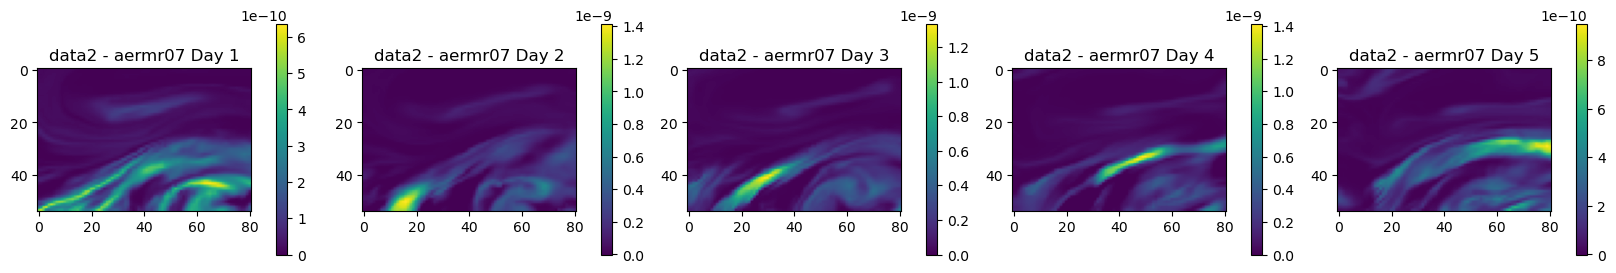

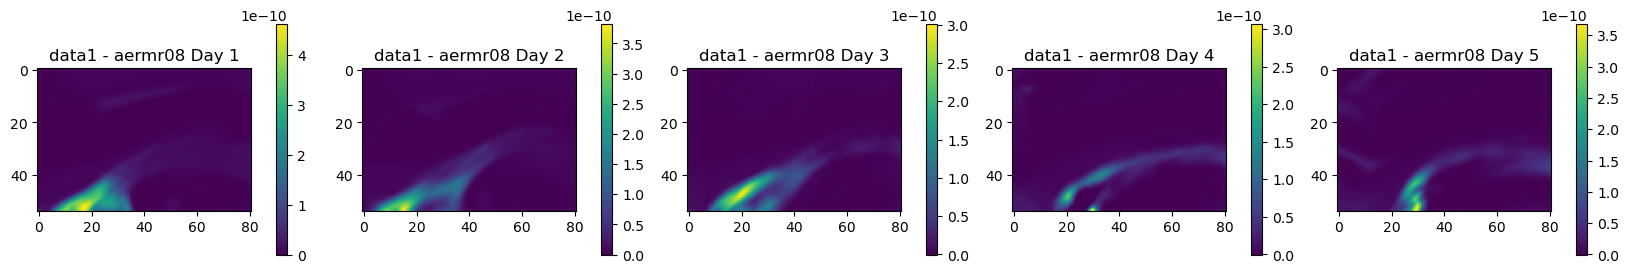

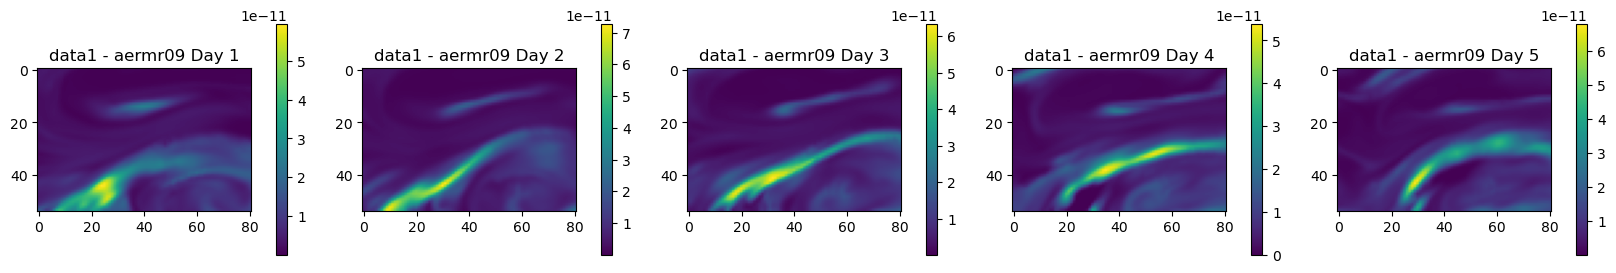

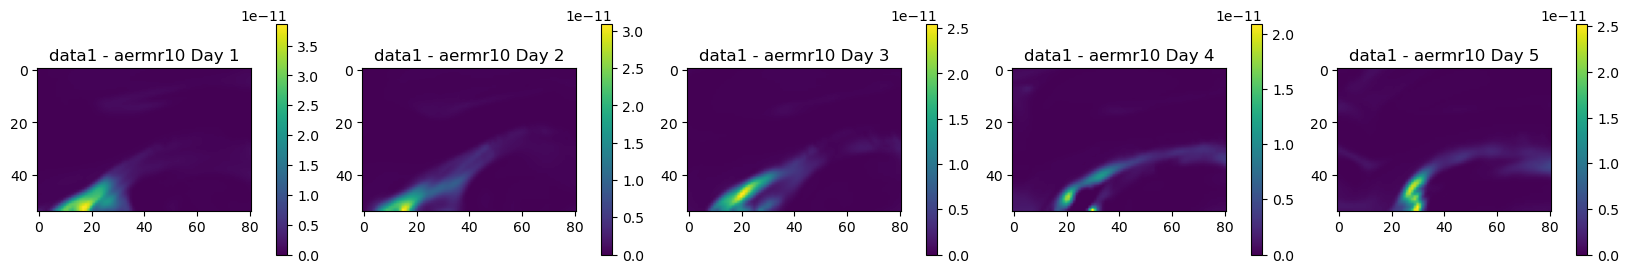

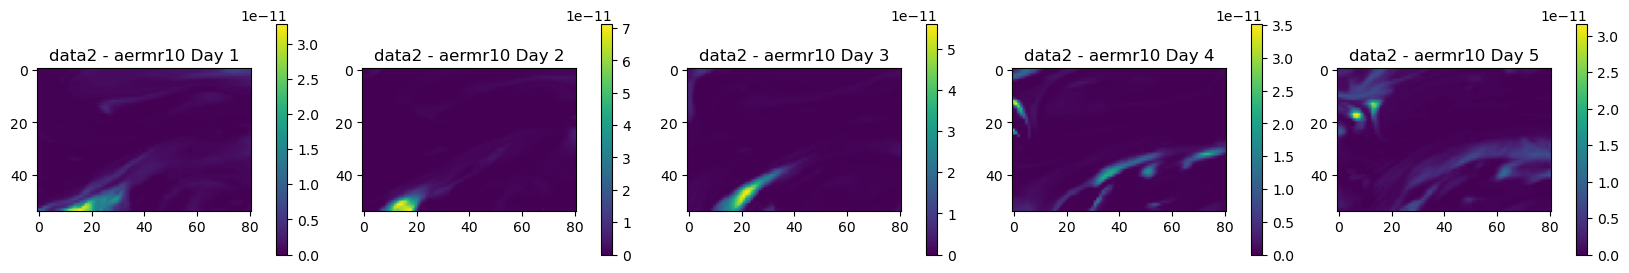

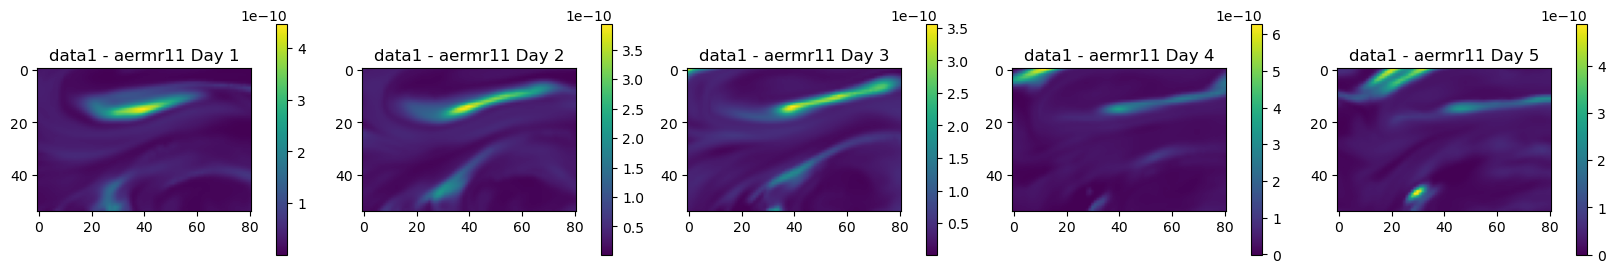

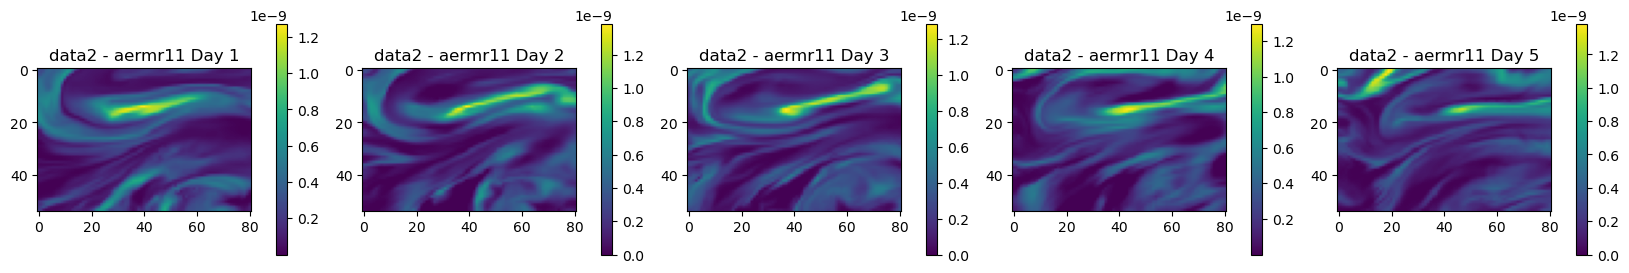

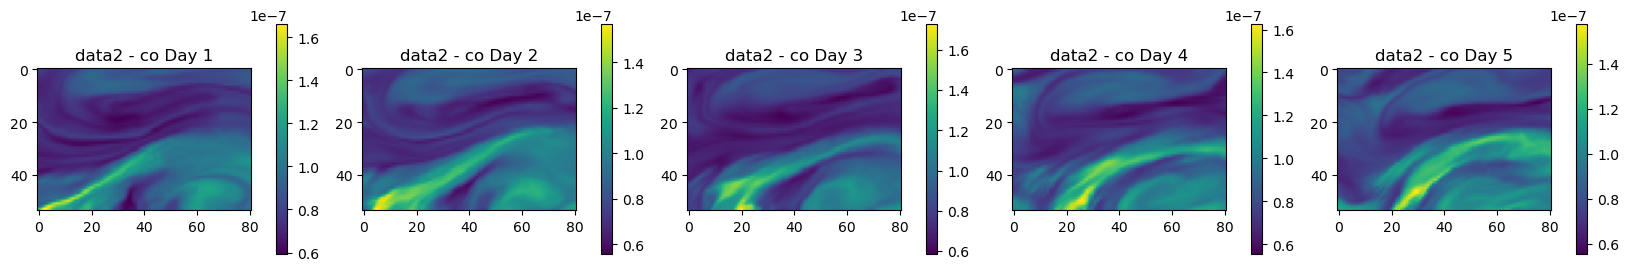

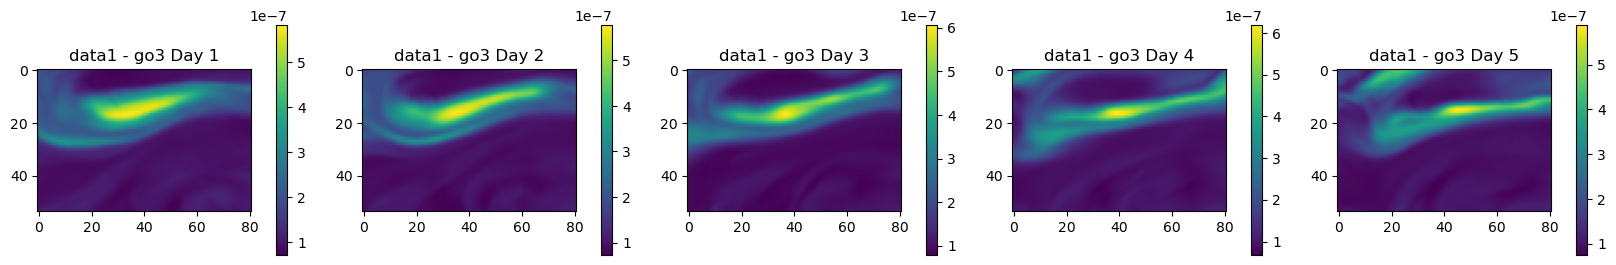

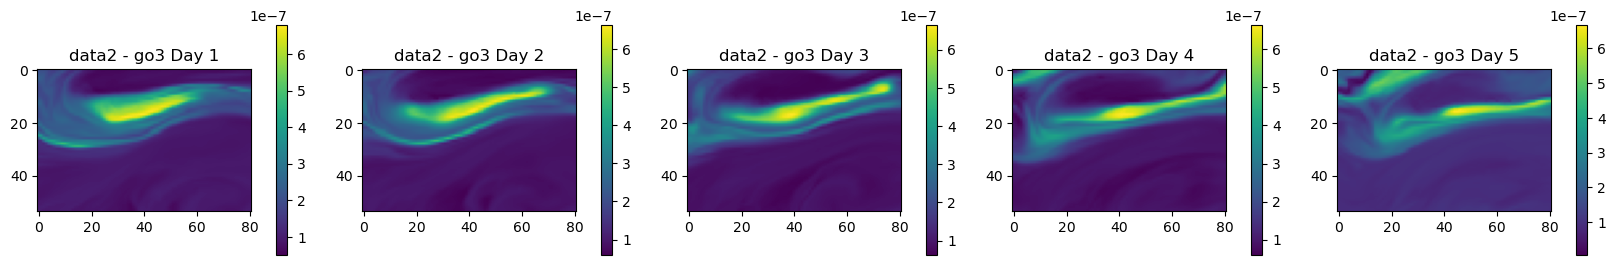

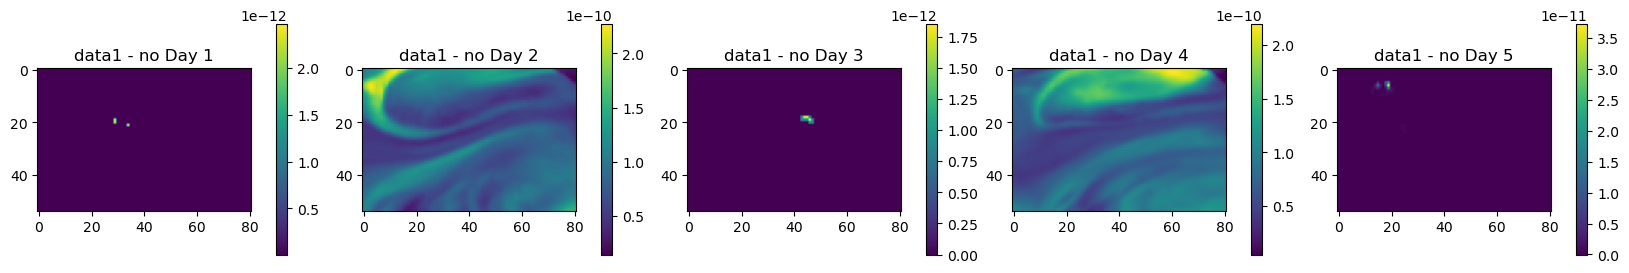

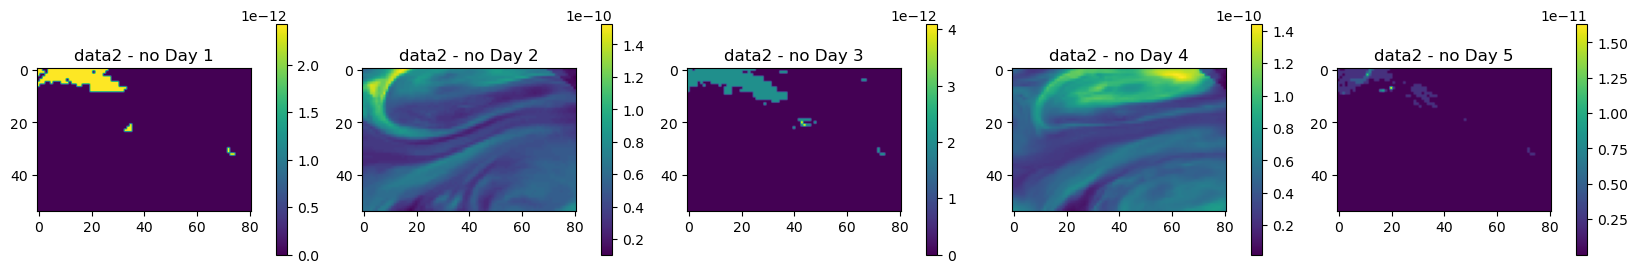

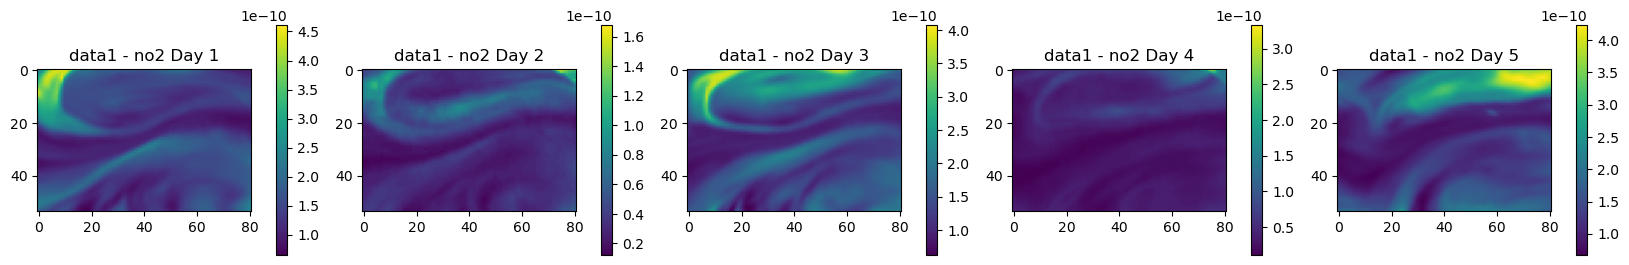

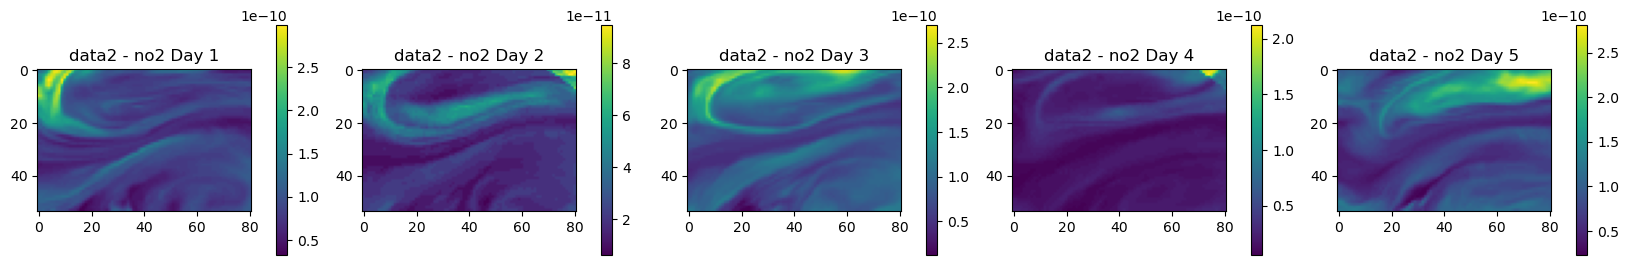

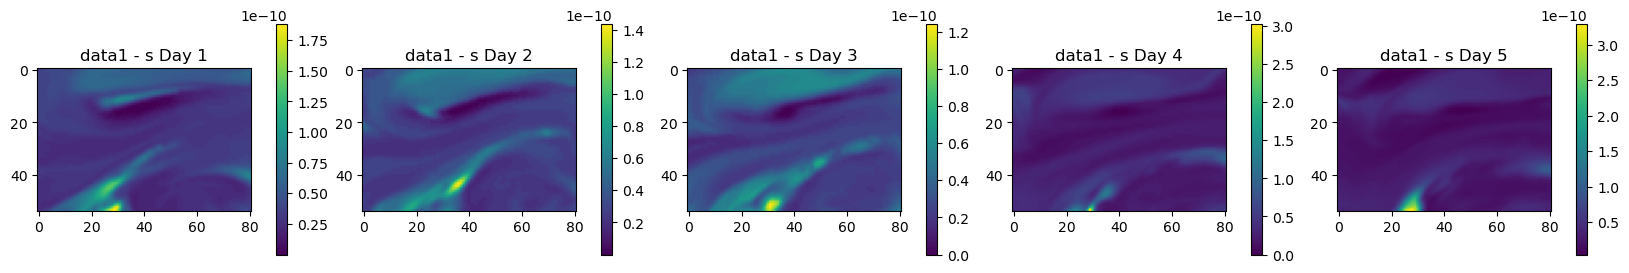

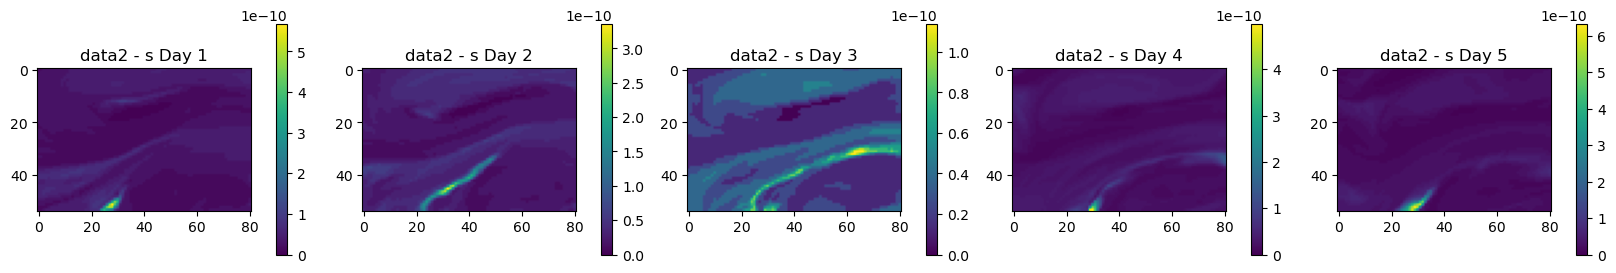

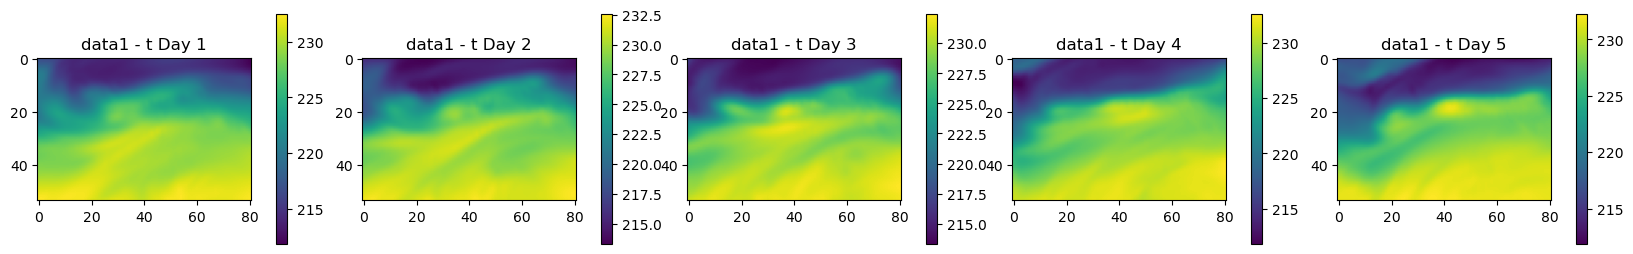

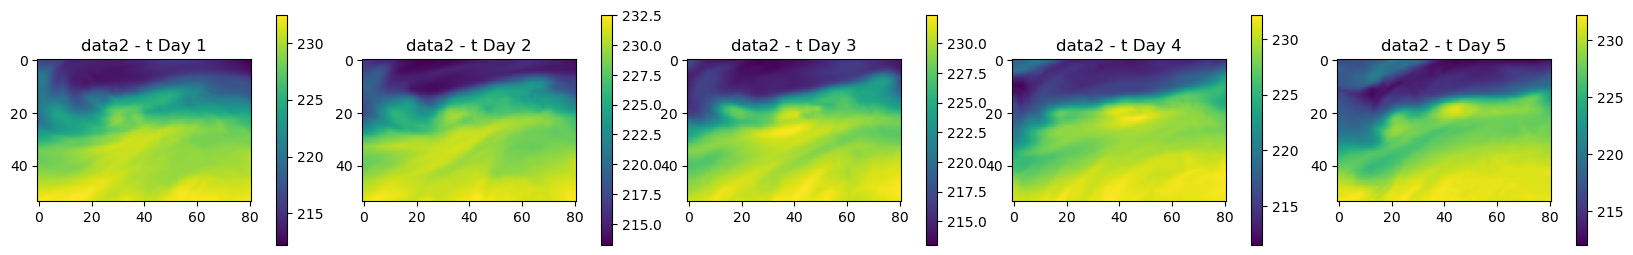

In [198]:
#for example
reanalysis_forecast_plots(meta_data_fore,data_rea_with_zeros[date[0]:,],data_fore_with_zeros[date[0]:,:,0])

In [ ]:
data = data_rea_with_zeros[0:1000,0]  # Replace this with your actual tensor

# Average across the first dimension to get a [3, 84, 81] tensor or choose a specific index like data[0]
data_averaged = np.mean(data, axis=0)

# Generate lat and lon indices
lat = np.arange(data_averaged.shape[1])  # 84
lon = np.arange(data_averaged.shape[2])  # 81
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Plot the 3D graph for each height slice
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Example: plotting for the first height dimension
height_index = 0  # Choose 0, 1, or 2 for the different height dimensions
height = data_averaged[height_index]

# Flatten the arrays for plotting
lat_flat = lat_grid.flatten()
lon_flat = lon_grid.flatten()
height_flat = height.flatten()

# Create the 3D scatter plot
ax.scatter(lat_flat, lon_flat, height_flat, c=height_flat, cmap='viridis')

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Height')

plt.show()

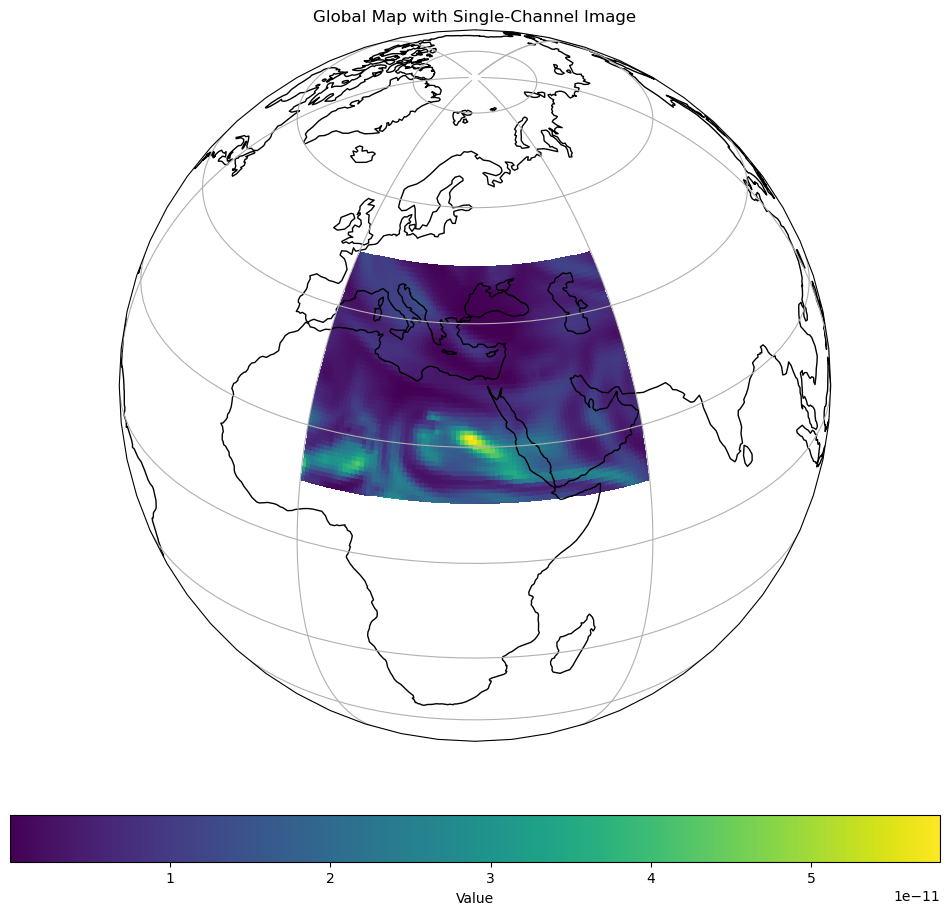

In [15]:
def plot_globe_with_image(lats, lons, image):
    # Create a globe projection
    proj = ccrs.Orthographic(central_longitude=30, central_latitude=30)
    
    # Create a new figure and axis with the globe projection
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection=proj)
    
    # Add coastlines and grid lines
    ax.coastlines()
    ax.gridlines()
    
    # Determine the extent of the image
    extent = [lons.min(), lons.max(), lats.min(), lats.max()]
    
    # Plot the image
    # For a single channel, we don't need to transpose
    img = ax.imshow(image, extent=extent, transform=ccrs.PlateCarree(), 
                    origin='lower', cmap='viridis')
    
    # Add a colorbar
    plt.colorbar(img, ax=ax, orientation='horizontal', pad=0.08, 
                 label='Value')
    
    plt.title("Global Map with Single-Channel Image")
    plt.show()

# Your latitude and longitude data
lats,lons=meta_data_fore["latitude"],meta_data_fore['longitude']

# Your image data
# Assuming it's a numpy array with shape (channels, lat, lon)
# For this example, let's create dummy data
image=data_rea_with_zeros[0,0,0]

# Call the function with your data
plot_globe_with_image(lats, lons, image)

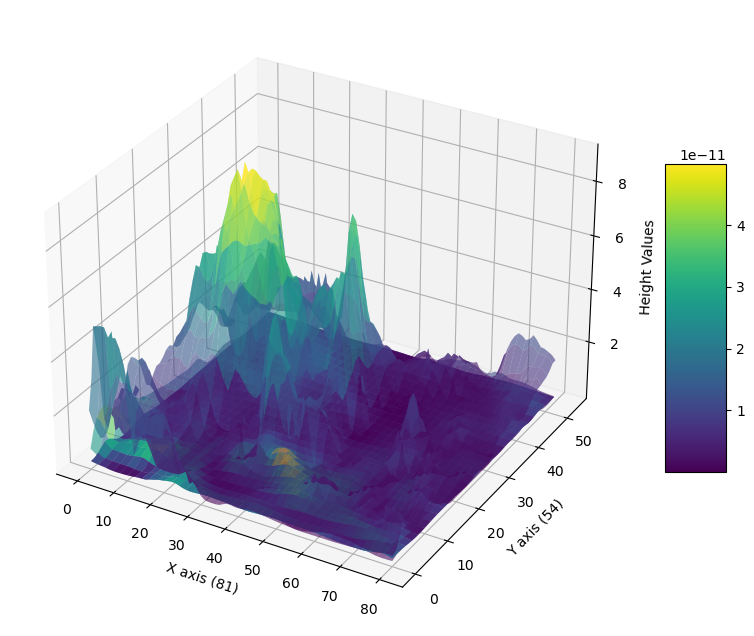

In [18]:
def plot_3d_surfaces(day_data):

    x = np.arange(day_data.shape[2])
    y = np.arange(day_data.shape[1])
    x, y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for height_idx in range(day_data.shape[0]):
        z = day_data[height_idx]  # height data for this surface
        ax.plot_surface(x, y, z, label=f'Height {height_idx+1}', cmap='viridis', alpha=0.6)

    mappable = ax.plot_surface(x, y, day_data[0], cmap='viridis')  # Use one of the surfaces for the color bar
    fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=5)

    ax.set_xlabel('X axis (81)')
    ax.set_ylabel('Y axis (54)')
    ax.set_zlabel('Height Values')

    plt.show()

data = data_rea_with_zeros[:,0]
day = 0
day_data = data[day]  # shape will be [3, 54, 81]

plot_3d_surfaces(day_data)

In [12]:
images=data_rea_with_zeros[0,0:3,0]

In [7]:
np.where(meta_data_fore['timestamps']=='2015-01-16')[0]

array([3])

In [9]:
data_fore_with_zeros.shape,data_rea_with_zeros.shape

(torch.Size([14894, 17, 3, 3, 54, 81]), torch.Size([14894, 17, 3, 54, 81]))

# differnce between 2 domains - specific day

distance: 2974.25439453125


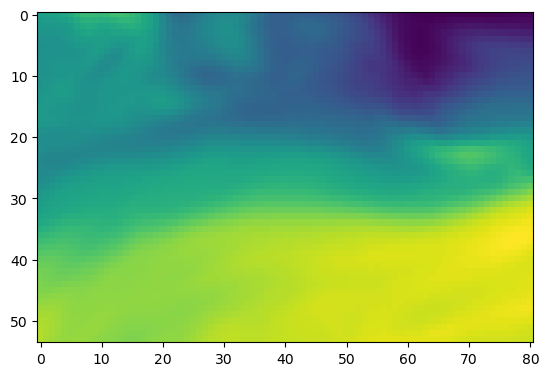

In [15]:
def diff_domains(data1,data2,timestamp,meta_data1,meta_data2): #tensors shape: [b,c,h,w]
    data1_time=np.where(meta_data1["timestamps"]==timestamp)[0]
    data2_time=np.where(meta_data2["timestamps"]==timestamp)[0]
    
    print(f"distance: {((data1[data1_time]-data2[data2_time])**2).mean()}")
    
    plt.imshow((((data1[data1_time]-data2[data2_time])**2).squeeze()).mean(0))
    
#example:

data_fore_with_zeros_try=data_fore_with_zeros[:,:,0,0]
data_rea_with_zeros_try=data_rea_with_zeros[:,:,0]
diff_domains(data_fore_with_zeros_try,data_rea_with_zeros_try,'2018-01-16',meta_data_fore,meta_data_rea)